_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

In [0]:
import requests, bs4

r = requests.get(url)

soup = bs4.BeautifulSoup(r.text)

titles = [elem.text.strip() for elem in soup.select("h2")]

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [145]:
long_titles = []
for i, title in enumerate(titles):
  if len(title) > 80:
    long_titles.append(title)

long_titles

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 2. List Comprehension

In [146]:
[title for title in titles if len(title) > 80]

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 3. Filter with named function

In [147]:
def long(title):
  return len(title) > 80
  
list(filter(long, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 4. Filter with anonymous function

In [148]:
list(filter(lambda t: len(t) > 80, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [149]:
import pandas as pd

ser = pd.Series(titles)

ser[ser.str.len() > 80]

19    Code like an accountant: Designing data system...
28    Debugging PySpark -- Or trying to make sense o...
46    How we designed an inclusivity-first conferenc...
51    Listen, Attend, and Walk : Interpreting natura...
78    The Hare Wins the Race: Getting the most out o...
dtype: object

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

In [0]:
df = pd.DataFrame({'titles':ser})

### title length

In [151]:
df['title length'] = df['titles'].str.len()
df.head()

,titles,title length
0,A Bit about Bytes: Understanding Python Bytecode,48
1,Adapting from Spark to Dask: what to expect,43
2,All in the timing: How side channel attacks work,48
3,Analyzing Data: What pandas and SQL Taught Me ...,69
4,A practical guide to Singular Value Decomposit...,59


### long title

In [0]:
df['long title'] = df['title length'] > 80

### first letter

In [153]:
df['first letter'] = df['titles'].str.lower().str.get(0)
df.head()

,titles,title length,long title,first letter
0,A Bit about Bytes: Understanding Python Bytecode,48,False,a
1,Adapting from Spark to Dask: what to expect,43,False,a
2,All in the timing: How side channel attacks work,48,False,a
3,Analyzing Data: What pandas and SQL Taught Me ...,69,False,a
4,A practical guide to Singular Value Decomposit...,59,False,a


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [154]:
!pip install textstat

In [0]:
import textstat

df['title word count'] = df['titles'].apply(textstat.lexicon_count)

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename(columns={'title length':'title character count'})

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [163]:
df.describe()

,title character count,title word count
count,95.000000,95.000000
mean,46.442105,7.189474
std,17.560664,2.903757
min,14.000000,2.000000
25%,35.000000,5.000000
50%,45.000000,7.000000
75%,56.000000,9.000000
max,100.000000,19.000000


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [164]:
df.sort_values('title word count').head()

,titles,title character count,long title,first letter,title word count
57,Practical Sphinx,16,False,p,2
8,Behavior-Driven Python,22,False,b,2
52,Love your bugs,14,False,l,3
6,Automating Code Quality,23,False,a,3
21,Coding through Adversity,24,False,c,3


Titles sorted reverse alphabetically

In [165]:
df.sort_values('first letter', ascending=False).head()

,titles,title character count,long title,first letter,title word count
94,You're an expert. Here's how to teach like one.,47,False,y,9
93,Win back lovely API: GraphQL in Python,38,False,w,7
91,What is a Python Core Developer?,32,False,w,6
90,Visual Testing with PyCharm and pytest,38,False,v,6
89,Visualizing Algorithms with Python and Program...,56,False,v,7


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [166]:
df['first letter'].value_counts()

p    12
t    11
b    11
c     8
d     7
a     7
s     6
e     5
h     5
r     3
f     3
l     3
w     2
i     2
v     2
g     2
u     2
o     2
y     1
"     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [167]:
df['long title'].value_counts() / len(df)

False    0.947368
True     0.052632
Name: long title, dtype: float64

In [168]:
df['long title'].value_counts(normalize=True)

False    0.947368
True     0.052632
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

AxesSubplot(0.125,0.125;0.775x0.755)


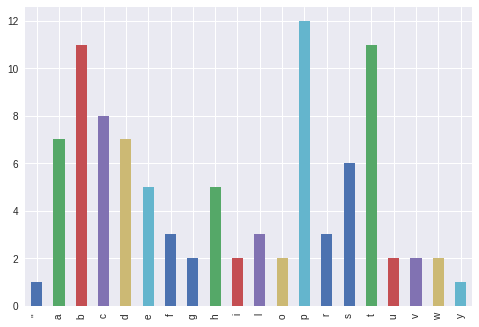

In [170]:
print(df['first letter'].value_counts().sort_index().plot.bar())

Histogram of title lengths, in characters

AxesSubplot(0.125,0.125;0.775x0.755)


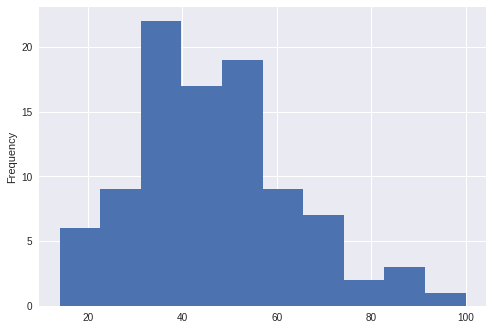

In [174]:
print(df['title character count'].plot.hist())

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [0]:
import requests, bs4

url = 'https://us.pycon.org/2018/schedule/talks/list/'
r = requests.get(url)

soup = bs4.BeautifulSoup(r.content)

descripts = [elem.text for elem in soup.select('.presentation-description')]

In [0]:
df['description'] = descripts

In [200]:
df[['titles', 'description']].head()

,titles,description
0,A Bit about Bytes: Understanding Python Bytecode,At some point every Python programmer sees Pyt...
1,Adapting from Spark to Dask: what to expect,"Until very recently, Apache Spark has been a d..."
2,All in the timing: How side channel attacks work,"In this talk, you’ll learn about a category of..."
3,Analyzing Data: What pandas and SQL Taught Me ...,"“So tell me,” my manager said, “what is an ave..."
4,A practical guide to Singular Value Decomposit...,Recommender systems have become increasingly p...


In [0]:
df['description_length_characters'] = df.description.str.len()
df['description_length_words'] = df.description.apply(textstat.lexicon_count)
df['description_grade_level'] = df.description.apply(textstat.flesch_kincaid_grade)

In [203]:
df.describe()

,title character count,title word count,desctiption_length_characters,desctiption_length_words,desctiption_grade_level
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,46.442105,7.189474,844.568421,134.578947,18.143158
std,17.560664,2.903757,448.598661,70.019082,15.827297
min,14.000000,2.000000,201.000000,35.000000,3.700000
25%,35.000000,5.000000,550.000000,91.500000,10.500000
50%,45.000000,7.000000,762.000000,119.000000,13.800000
75%,56.000000,9.000000,976.500000,149.500000,18.400000
max,100.000000,19.000000,2794.000000,436.000000,107.800000


In [210]:
tweetable = df.loc[df.desctiption_length_characters <= 280, 'description']
print(tweetable)

44    A function is a small chunk of code that does ...
62    For 2 years, a family of three has traveled on...
65    Python 3 removes a lot of the confusion around...
Name: description, dtype: object


AxesSubplot(0.125,0.125;0.775x0.755)


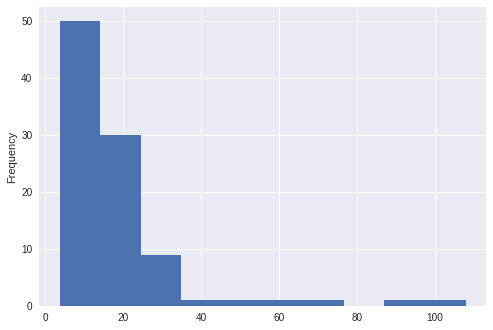

In [206]:
print(df.desctiption_grade_level.plot.hist())